In [1]:
import tensorflow as tf
import numpy as np
import gym
import tensorflow.keras.layers as layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from lunar_lander import LunarLander2QModel
from maslourl.trackers.file_logger import FileLogger

In [2]:
replay_buffer_size = 200000
learning_rate = 0.001
regularization_factor = 0.001
training_batch_size = 128
training_start = 256
max_episodes = 10000
max_steps = 1000
target_network_replace_frequency_steps = 1000
model_backup_frequency_episodes = 100
starting_epsilon = 1.0
minimum_epsilon = 0.01
epsilon_decay_factor_per_episode = 0.995
discount_factor = 0.99
train_every_x_steps = 4

In [3]:
env = gym.make('LunarLander-v2')

In [4]:
from maslourl.models.utils import masked_huber_loss

def build_model(states, actions):
    inputs = layers.Input(shape=(states,))
    x = layers.Dense(64, activation="relu")(inputs)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(actions, activation="linear")(x)
    model = Model(inputs, outputs, name="LunarLander")
    model.compile(Adam(learning_rate=learning_rate), loss=masked_huber_loss())
    return model

In [5]:
model = build_model(9, 4)

In [6]:
agent = LunarLander2QModel(env, model,max_steps, replay_buffer_size=replay_buffer_size)

In [7]:
agent.summary()

Observation space: Box([-inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf], (8,), float32)
Action space: Discrete(4)
Model: "LunarLander"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 64)                640       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)      

In [ ]:
agent.train(episodes=max_episodes, max_steps_for_episode=max_steps, starting_epsilon=starting_epsilon, min_epsilon=minimum_epsilon,
            epsilon_decay_for_episode=epsilon_decay_factor_per_episode, target_network_replace_frequency_steps=target_network_replace_frequency_steps,
            warmup_before_start_trainings_steps=training_start, train_every_x_steps=train_every_x_steps,training_batch_size=training_batch_size,
            discount_factor=discount_factor, model_backup_frequency_episodes= model_backup_frequency_episodes,path_to_back_up="./back_ups/",
            episodes_for_average_tracking=100, file_logger=FileLogger("./logging/log1.csv"))

INFO:tensorflow:Assets written to: backup_b33edd00-28d9-498d-9e70-bbc4df72e57b\assets
Starting episode 0
episode 0 finished in 130 steps with reward -178.62. Average reward over last 100: -178.62 And took: 6.00 seconds. 
Starting episode 1
episode 1 finished in 72 steps with reward -75.06. Average reward over last 100: -126.84 And took: 3.12 seconds. 
Starting episode 2
episode 2 finished in 86 steps with reward -308.15. Average reward over last 100: -187.28 And took: 5.54 seconds. 
Starting episode 3
episode 3 finished in 106 steps with reward -116.63. Average reward over last 100: -169.61 And took: 8.41 seconds. 
Starting episode 4
episode 4 finished in 87 steps with reward -135.88. Average reward over last 100: -162.87 And took: 6.86 seconds. 
Starting episode 5
episode 5 finished in 101 steps with reward -382.60. Average reward over last 100: -199.49 And took: 7.98 seconds. 
Starting episode 6
episode 6 finished in 70 steps with reward -178.86. Average reward over last 100: -196.54

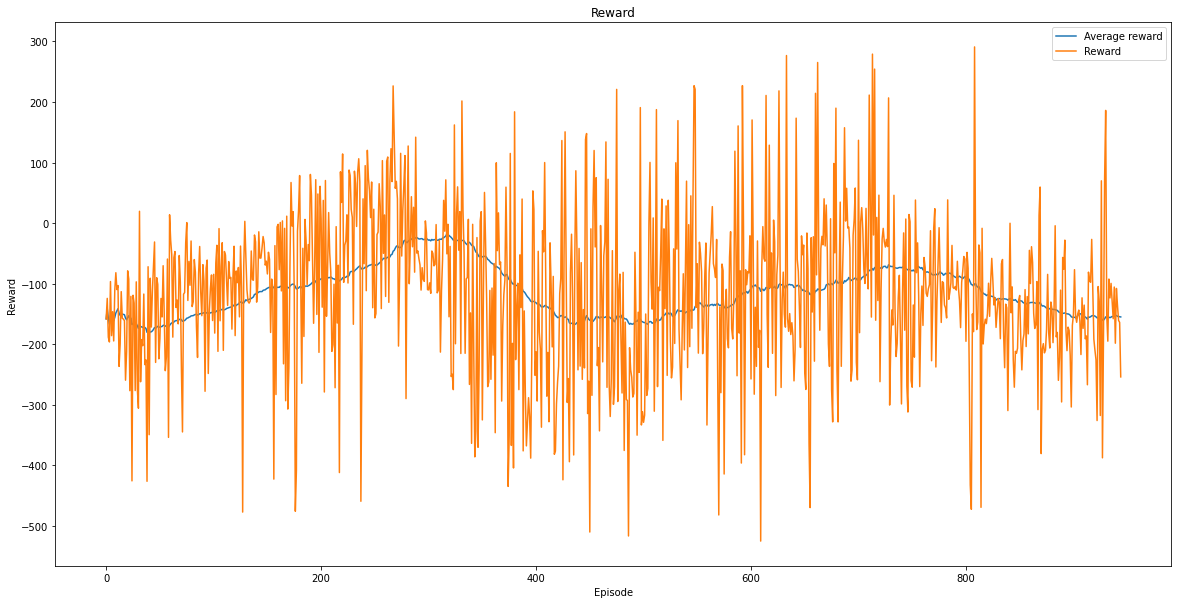

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./logging/log1.csv", sep=';')

plt.figure(figsize=(20,10))
plt.plot(data['average'])
plt.plot(data['reward'])
plt.title('Reward')
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.legend(['Average reward', 'Reward'], loc='upper right')
plt.show()